Homogeneous Game:

Saved history files to live_game/

=== XGBoost Predictions Every 50 Rounds ===
Round 0: Predicted colluders = []
Round 50: Predicted colluders = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Round 100: Predicted colluders = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Round 150: Predicted colluders = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Round 200: Predicted colluders = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
Round 250: Predicted colluders = [0, 1, 2, 3, 5, 6, 8, 9, 11]
Round 300: Predicted colluders = [0, 1, 2, 3, 5, 9]
Round 350: Predicted colluders = [0, 1, 2]
Round 400: Predicted colluders = [0, 1, 2]
Round 450: Predicted colluders = [0, 1, 2]
Round 500: Predicted colluders = [0, 1, 2]
Round 550: Predicted colluders = [1, 2]
Round 600: Predicted colluders = [0, 1, 2]
Round 650: Predicted colluders = [0, 1, 2]
Round 700: Predicted colluders = [0, 1, 2]
Round 750: Predicted colluders = [0, 1, 2]
Round 800: Predicted colluders = [0, 1, 2]
Round 850: Predicted colluders = [0, 1, 2]
Round 900: Predicted

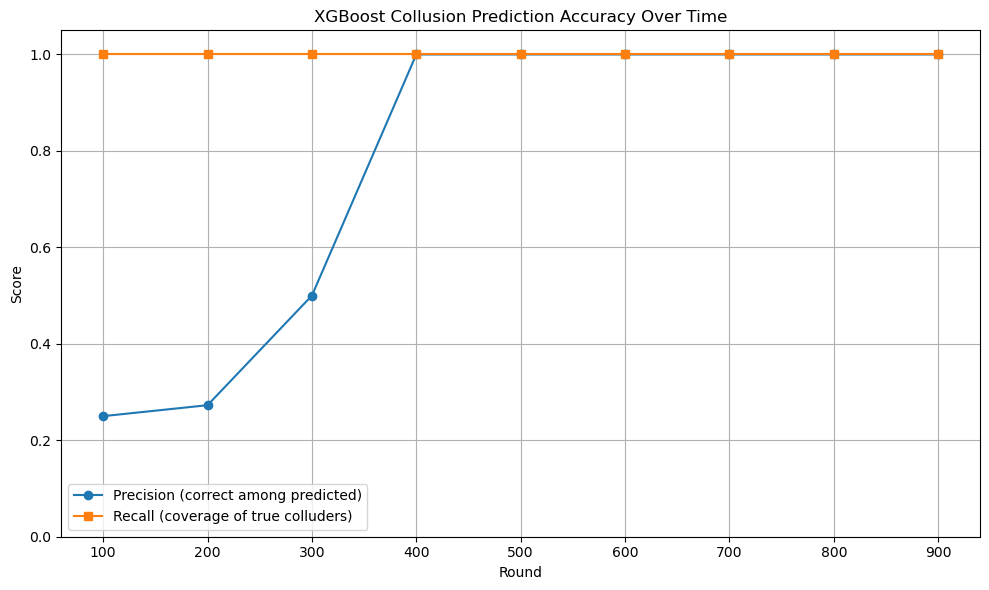


True colluders:      [0, 1, 2]


In [ ]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from games.game import simulate_game  # or use risky_collusion_game if needed

def true_labels(num_players, num_colluders):
    return np.array([1 if i < num_colluders else 0 for i in range(num_players)])

# === Load trained model and scaler ===
model = joblib.load('xgb_model.pkl')
scaler = joblib.load('xgb_scaler.pkl')

# === Simulate game ===
save_dir = "live_game"
num_players = 12
num_colluders = 3
simulate_game(save_dir=save_dir, seed=42, num_players=num_players, num_colluders=num_colluders)

rewards = np.load(os.path.join(save_dir, 'history_rewards.npy'))
regrets = np.load(os.path.join(save_dir, 'history_regrets.npy'))
true = true_labels(num_players, num_colluders)
num_rounds = rewards.shape[1]

# === Settings ===
print_interval = 50
plot_interval = 100
time_points = list(range(0, num_rounds, print_interval))

# === Track metrics ===
recall_list = []
precision_list = []
plot_times = []

print("\n=== XGBoost Predictions Every 50 Rounds ===")
for t in time_points:
    avg_rewards = rewards[:, :t+1].mean(axis=1)
    avg_regrets = regrets[:, :t+1].mean(axis=1)
    std_rewards = rewards[:, :t+1].std(axis=1)
    std_regrets = regrets[:, :t+1].std(axis=1)
    regret_over_reward = avg_regrets / (avg_rewards + 1e-6)

    X_t = np.vstack([
        avg_rewards,
        avg_regrets,
        std_rewards,
        std_regrets,
        regret_over_reward
    ]).T
    X_scaled = scaler.transform(X_t)
    preds = model.predict(X_scaled)

    pred_colluders = np.where(preds == 1)[0].tolist()
    print(f"Round {t}: Predicted colluders = {pred_colluders}")

    # === Calculate metrics every 100 rounds ===
    if t % plot_interval == 0 and t > 0:
        true_colluders = set(np.where(true == 1)[0])
        pred_set = set(pred_colluders)

        tp = len(true_colluders & pred_set)
        fp = len(pred_set - true_colluders)
        fn = len(true_colluders - pred_set)

        precision = tp / (tp + fp + 1e-6)
        recall = tp / (tp + fn + 1e-6)

        precision_list.append(precision)
        recall_list.append(recall)
        plot_times.append(t)

# === Plot Precision & Recall ===
plt.figure(figsize=(10, 6))
plt.plot(plot_times, precision_list, marker='o', label='Precision (correct among predicted)')
plt.plot(plot_times, recall_list, marker='s', label='Recall (coverage of true colluders)')
plt.xlabel("Round")
plt.ylabel("Score")
plt.title("XGBoost Collusion Prediction Accuracy Over Time")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Final Output ===
print("\nTrue colluders:     ", np.where(true == 1)[0].tolist())


Heterogeneous Game:

Saved to live_game

=== XGBoost Predictions Every 50 Rounds ===
Round 0: Predicted colluders = []
Round 50: Predicted colluders = [0, 1, 2]
Round 100: Predicted colluders = [0, 1, 2]
Round 150: Predicted colluders = [0, 1, 2]
Round 200: Predicted colluders = [0, 1, 2]
Round 250: Predicted colluders = [0, 1, 2]
Round 300: Predicted colluders = [0, 1, 2]
Round 350: Predicted colluders = [0, 1, 2]
Round 400: Predicted colluders = [0, 1, 2]
Round 450: Predicted colluders = [0, 1, 2]
Round 500: Predicted colluders = [0, 1, 2]
Round 550: Predicted colluders = [0, 1, 2]
Round 600: Predicted colluders = [0, 1, 2]
Round 650: Predicted colluders = [0, 1, 2]
Round 700: Predicted colluders = [0, 1, 2]
Round 750: Predicted colluders = [0, 1, 2]
Round 800: Predicted colluders = [0, 1, 2]
Round 850: Predicted colluders = [0, 1, 2]
Round 900: Predicted colluders = [0, 1, 2]
Round 950: Predicted colluders = [0, 1, 2]


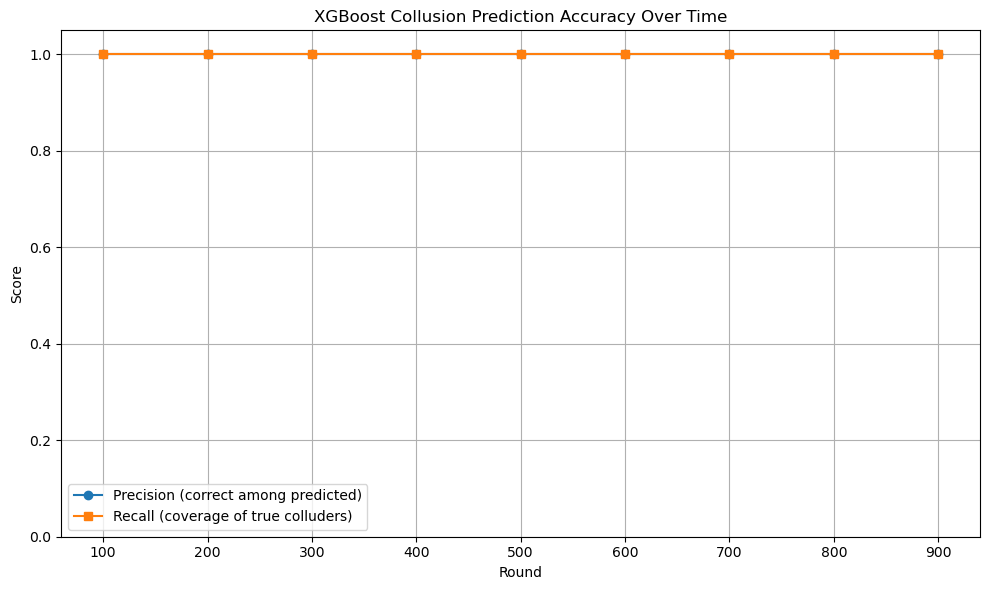


True colluders:      [0, 1, 2]


In [ ]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from games.game import simulate_game  # or use risky_collusion_game if needed
from games.risky_collusion_game import simulate_risky_collusion_game

def true_labels(num_players, num_colluders):
    return np.array([1 if i < num_colluders else 0 for i in range(num_players)])

# === Load trained model and scaler ===
model = joblib.load('xgb_model.pkl')
scaler = joblib.load('xgb_scaler.pkl')

# === Simulate game ===
save_dir = "live_game"
num_players = 12
num_colluders = 3
simulate_risky_collusion_game(save_dir=save_dir, seed=42, num_players=num_players, num_colluders=num_colluders)

rewards = np.load(os.path.join(save_dir, 'history_rewards.npy'))
regrets = np.load(os.path.join(save_dir, 'history_regrets.npy'))
true = true_labels(num_players, num_colluders)
num_rounds = rewards.shape[1]

# === Settings ===
print_interval = 50
plot_interval = 100
time_points = list(range(0, num_rounds, print_interval))

# === Track metrics ===
recall_list = []
precision_list = []
plot_times = []

print("\n=== XGBoost Predictions Every 50 Rounds ===")
for t in time_points:
    avg_rewards = rewards[:, :t+1].mean(axis=1)
    avg_regrets = regrets[:, :t+1].mean(axis=1)
    std_rewards = rewards[:, :t+1].std(axis=1)
    std_regrets = regrets[:, :t+1].std(axis=1)
    regret_over_reward = avg_regrets / (avg_rewards + 1e-6)

    X_t = np.vstack([
        avg_rewards,
        avg_regrets,
        std_rewards,
        std_regrets,
        regret_over_reward
    ]).T
    X_scaled = scaler.transform(X_t)
    preds = model.predict(X_scaled)

    pred_colluders = np.where(preds == 1)[0].tolist()
    print(f"Round {t}: Predicted colluders = {pred_colluders}")

    # === Calculate metrics every 100 rounds ===
    if t % plot_interval == 0 and t > 0:
        true_colluders = set(np.where(true == 1)[0])
        pred_set = set(pred_colluders)

        tp = len(true_colluders & pred_set)
        fp = len(pred_set - true_colluders)
        fn = len(true_colluders - pred_set)

        precision = tp / (tp + fp + 1e-6)
        recall = tp / (tp + fn + 1e-6)

        precision_list.append(precision)
        recall_list.append(recall)
        plot_times.append(t)

# === Plot Precision & Recall ===
plt.figure(figsize=(10, 6))
plt.plot(plot_times, precision_list, marker='o', label='Precision (correct among predicted)')
plt.plot(plot_times, recall_list, marker='s', label='Recall (coverage of true colluders)')
plt.xlabel("Round")
plt.ylabel("Score")
plt.title("XGBoost Collusion Prediction Accuracy Over Time")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Final Output ===
print("\nTrue colluders:     ", np.where(true == 1)[0].tolist())